## Multiple Variable Linear Regression
多变量线性回归



In [1]:
!python --version

Python 3.9.6


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy,math
from common import compute_cost_multi,gradient_function_multi,gradient_descent_multi

np.set_printoptions(precision=2)

In [3]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])


print(f"X_train shape: {X_train.shape}, X type: {type(X_train)}")
print(X_train)

print(f"y_train shape: {y_train.shape}, y type: {type(y_train)}")
print(y_train)

X_train shape: (3, 4), X type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y_train shape: (3,), y type: <class 'numpy.ndarray'>
[460 232 178]


In [4]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [5]:
def predict_single_loop(w,x,b):
    """
    Predicts y = w * x + b
    :param w: 
    :param x: 
    :param b: 
    :return: 
    """
    
    # numbers of feature
    n = x.shape[0]
    p = 0
    
    for i in range(n):
        p_i = w[i] * x[i]
        p = p + p_i
    p = p + b
    
    return p


x_vec = X_train[0,:]
print(f"x_vec shape: {x_vec.shape}, x_vec = {x_vec}")

# make a prediction
f_wb = predict_single_loop(w_init,x_vec,b_init)
print(f"f_wb shape: {f_wb.shape}, prediction: {f_wb}")

x_vec shape: (4,), x_vec = [2104    5    1   45]
f_wb shape: (), prediction: 459.9999976194083


In [6]:
def predict(w,x,b):
    """
    Predicts y = w.x + b
    :param w: 
    :param x: 
    :param b: 
    :return: 
    """
    return np.dot(w,x) + b

In [7]:
cost = compute_cost_multi(w_init,b_init,X_train,y_train)
print(f"cost: {cost}")

cost: 1.5578904045996674e-12


In [8]:
#Compute and display gradient 
tmp_dj_dw, tmp_dj_db = gradient_function_multi(w_init, b_init,X_train, y_train)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: 
 [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]


In [9]:
init_w = np.zeros_like(w_init)
init_b = 0.

iterations = 1000
alpha = 5.0e-7

w,b,cost_history = gradient_descent_multi(init_w,init_b,X_train,y_train,alpha,iterations)
print(f"b,w found by gradient descent: {b:0.2f},{w} ")

Iteration    0: Cost  2529.46
Iteration  100: Cost   695.99
Iteration  200: Cost   694.92
Iteration  300: Cost   693.86
Iteration  400: Cost   692.81
Iteration  500: Cost   691.77
Iteration  600: Cost   690.73
Iteration  700: Cost   689.71
Iteration  800: Cost   688.70
Iteration  900: Cost   687.69
b,w found by gradient descent: -0.00,[ 0.2   0.   -0.01 -0.07] 


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (900, 5) + inhomogeneous part.

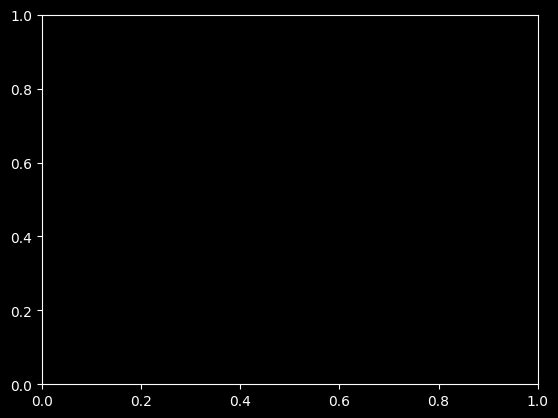

In [10]:
plt.plot(100 + np.arange(len(cost_history[100:])), cost_history[100:])
plt.show()

## Draw
